Lets test our PyTorch CIFAR10 model.

Based on standard PyTorch example:  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

from model import Net

MODEL_DIR = "../outputs"

Define function to display CIFAR 10 test images.

In [2]:
def imshow(img):
    """Show image."""
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Load CIFAR 10 test dataset.

In [3]:
# download CIFAR 10 data
testset = torchvision.datasets.CIFAR10(
   root="../data",
   train=False,
   download=True,
   transform=torchvision.transforms.ToTensor(),
)
testloader = torch.utils.data.DataLoader(
   testset, batch_size=4, shuffle=True, num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


Load our trained PyTorch model.

In [6]:
# load (local) model
path = os.path.join(MODEL_DIR, "net.pt")
net = Net()
net.load_state_dict(torch.load(path))
net.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Let's take a look at an example test batch!

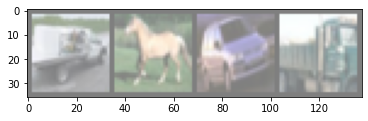

GroundTruth:  truck horse   car truck


In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

What did our model think?

In [8]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  truck horse truck truck


And how did the model do overall?

In [9]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %
